In [1]:
import PIL

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import keras
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
infected_data = os.listdir('../cell_images/cell_images/Parasitized/')

In [4]:
uninfected_data = os.listdir('../cell_images/cell_images/Uninfected/')

In [5]:
print(infected_data[:10]) 

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


In [6]:
print(uninfected_data[:5])

['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png']


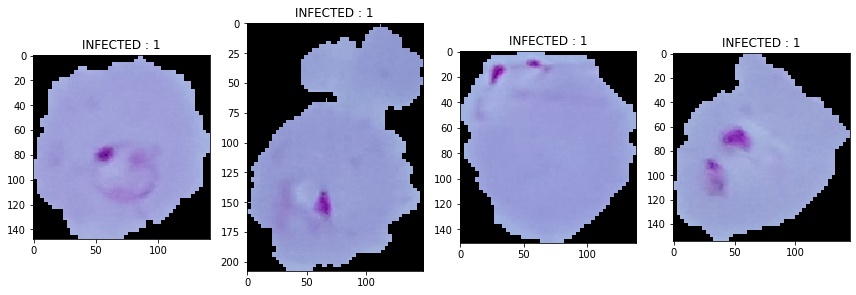

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell_images/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

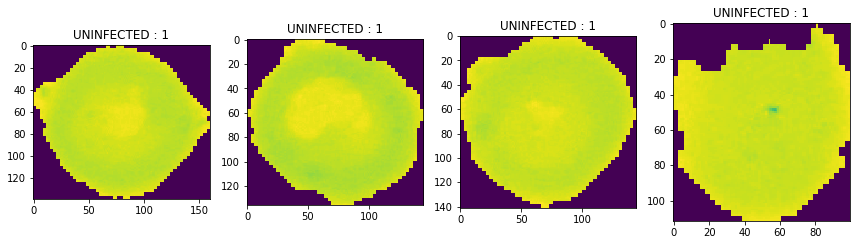

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell_images/cell_images/Uninfected' + "/" + uninfected_data[i],cv2.IMREAD_GRAYSCALE)
    plt.imshow(img)
    plt.title('UNINFECTED : 1')
    plt.tight_layout()
plt.show()


In [66]:
data = []
labels = []
for img in infected_data:
    try:
        img_read = plt.imread('../cell_images/cell_images/Parasitized/' + "/" + img)
        img_read=cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
        img_resize = cv2.resize(img_read,(50, 50))
        img_array = img_to_array(img_resize)
        img_aray=img_array/255.0
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../cell_images/cell_images/Uninfected' + "/" + img)
        img_read= cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

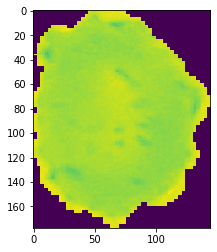

In [70]:

cv2.imshow('Gray image',img_read)
plt.imshow(img_read)

In [11]:
image_data=np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [14]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (22046, 50, 50, 3)
Shape of testing image : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels : (5512, 2)


In [15]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [16]:
inputShape= (50,50,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [48]:
x_test.shape

(5512, 50, 50, 3)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
H=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=1)

Train on 22046 samples, validate on 5512 samples
Epoch 1/1
22046/22046 [==============================] - 822s 37ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 4.9844e-07 - val_accuracy: 1.0000


In [49]:
model.predict(x_test,batch_size=16)

array([[1.7644177e-07, 9.9999988e-01],
       [1.0000000e+00, 9.6158801e-12],
       [1.0000000e+00, 9.6432281e-12],
       ...,
       [1.0000000e+00, 9.7268357e-12],
       [8.3611013e-08, 9.9999988e-01],
       [3.0516881e-07, 9.9999964e-01]], dtype=float32)

In [74]:
model.predict(x_test[0:1])

array([[1.7644227e-07, 9.9999988e-01]], dtype=float32)

In [75]:
x_test.shape

(5512, 50, 50, 3)

In [59]:
predictions = model.predict(x_test)

In [60]:
predictions[0]

array([1.7644194e-07, 9.9999988e-01], dtype=float32)

In [77]:
if predictions[0][0]>5.0:
    print("uninfected")
else:
    print("infected")

infected


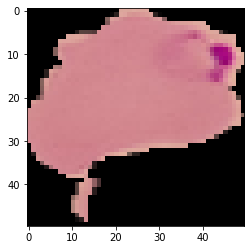

In [91]:
#cv2.imshow('Gray image',x_test[0][0])
plt.imshow(x_test[0])


In [87]:
print(y_test[0])

[0. 1.]


In [88]:
print(y_test[1])

[1. 0.]
